Els cinc grans trets de personalitat, també coneguts com el model de cinc factors (FFM) i el model OCEAN, és una taxonomia, o agrupació, per als trets de personalitat. Quan s'aplica l'anàlisi de factors (una tècnica estadística) a les dades de l'enquesta de personalitat, algunes paraules utilitzades per descriure aspectes de la personalitat s'apliquen sovint a la mateixa persona. Per exemple, és més probable que algú descrit com a conscient sigui descrit com "sempre preparat" en lloc de "maldestre". Aquesta teoria es basa, per tant, en l'associació entre paraules però no en experiments neuropsicològics. Aquesta teoria utilitza descriptors del llenguatge comú i, per tant, suggereix cinc grans dimensions comunament utilitzades per descriure la personalitat humana i la psique.

La idea és que amb aquest conjunt de dades, que conté respostes de 1-5 (1=Desgrau, 3=Neutral, 5=Acord) a diverses preguntes, es classifiqui cada persona segons els 5 trets del model Big Five, utilitzant un enfocament de classificació que agrupa les persones en categories en funció de les seves puntuacions. Per a això, definirem un llindar per a quantificar la presència de cada tret de personalitat en diferents individus: Baix, Mitjà, Alt. Com quantificarem aquest llindar? Utilitzant percentils. Per exemple, una puntuació d'Extroversió , 75 indicaria Alta Extroversió.

1. LIBRARIES IMPORTATION AND DATA READING

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as bplt
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix, average_precision_score, precision_recall_curve, auc, roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [161]:
dataset = pd.read_csv(f'C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/data-final.csv', delimiter='\t', encoding='utf-8')

In [162]:
print("\nMirem descripció general:")
dataset.describe()


Mirem descripció general:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [163]:
print("Número d'atributs del dataset:", len(dataset.keys()))
print("Número de files en el dataset: ",dataset.shape[0])

print("\nAtributs del dataset i el seu tipus:")
print (dataset.dtypes) 

Número d'atributs del dataset: 110
Número de files en el dataset:  1015341

Atributs del dataset i el seu tipus:
EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object


Com realment no queda clar quin és el significat de cada atribut, crearem un algorisme amb el qual l'usuari pugui comprovar que vol dir cadascun d'ells

In [164]:
# Clean text from invisible characters
def cleaning(text):
    # Replace tabs and other invisible characters with spaces
    return text.replace("\t", " ").replace("\n", " ").strip()

# Load the questions and their descriptions into a dictionary
def questions(file):
    qts = {}
    with open(file, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                clean_line = cleaning(line)
                # Split by spaces or tabs to get key and description
                sections = clean_line.split(maxsplit=1)
                if len(sections) == 2:
                    key, description = sections
                    qts[key.strip()] = description.strip()  # Normalize spaces
    return qts

# Look up the meaning of a key
def meaning(questions):
    while True:
        keys = input("Enter the key that you want to know (or type 'leave' to finish): ").strip()
        if keys.lower() == 'leave':
            print("Search finished.")
            break
        elif keys in questions:
            print(f"{keys}: {questions[keys]}")
        else:
            print(f"The key '{keys}' is not in the file. Please try again.")

# Path to the Questions.txt file
file = "C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/Questions.txt"

try:
    # Load the questions
    questions = questions(file)
    print("The questions have been loaded successfully.")
    # Start the interactive search
    meaning(questions)
except FileNotFoundError:
    print(f"The file '{file}' was not found.")
except Exception as e:
    print(f"Error: {e}")


The questions have been loaded successfully.
Search finished.


In [165]:
numeric_features = dataset.select_dtypes(np.number).keys()
non_numeric = [k for k in dataset.keys() if k not in numeric_features]
print("Numeric features: ", numeric_features)
print("Non numeric features: ", non_numeric)
print(dataset[non_numeric].dtypes)

Numeric features:  Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'screenw', 'screenh',
       'introelapse', 'testelapse', 'endelapse', 'IPC'],
      dtype='object', length=106)
Non numeric features:  ['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']
dateload                 object
country                  object
lat_appx_lots_of_err     object
long_appx_lots_of_err    object
dtype: object


Miraremos de hacer el cambio de las variables categóricas a numéricas

In [166]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'country'
dataset['country'] = le.fit_transform(dataset['country'])

# Convertir las columnas 'lat_appx_lots_of_err' y 'long_appx_lots_of_err' a tipo numérico
# Usamos pd.to_numeric() para manejar valores no numéricos, convirtiéndolos a NaN si es necesario

dataset['lat_appx_lots_of_err'] = pd.to_numeric(dataset['lat_appx_lots_of_err'], errors='coerce')
dataset['long_appx_lots_of_err'] = pd.to_numeric(dataset['long_appx_lots_of_err'], errors='coerce')

#fusionem les variables per crear el tamany de pantalla
dataset['screen_size'] = dataset['screenh'] * dataset['screenw']
dataset.drop(columns=['screenw', 'screenh'], inplace=True)
dataset.head()

# Asegurarse de que la columna esté en formato datetime
dataset['dateload'] = pd.to_datetime(dataset['dateload'], format='%Y-%m-%d %H:%M:%S')

# Convertir a número de segundos desde el Unix epoch
dataset['dateload_numeric'] = dataset['dateload'].astype('int64') // 10**9

# Verificar los primeros valores
print(dataset[['dateload', 'dateload_numeric']].head())

dataset.head()

             dateload  dateload_numeric
0 2016-03-03 02:01:01        1456970461
1 2016-03-03 02:01:20        1456970480
2 2016-03-03 02:01:56        1456970516
3 2016-03-03 02:02:02        1456970522
4 2016-03-03 02:02:57        1456970577


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,screen_size,dateload_numeric
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,9.0,234.0,6,1,69,51.5448,0.1991,786432.0,1456970461
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,12.0,179.0,11,1,144,3.1698,101.7060,1044480.0,1456970480
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,3.0,186.0,7,1,69,54.9119,-1.3833,1049088.0,1456970516
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,186.0,219.0,7,1,69,51.7500,-1.2500,2304000.0,1456970522
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,8.0,315.0,17,2,103,1.0000,38.0000,1049088.0,1456970577


In [167]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)


NÚMERO DE NANS POR COLUMNA:
EXT1                      1783
EXT2                      1783
EXT3                      1783
EXT4                      1783
EXT5                      1783
                         ...  
introelapse               2066
testelapse                1783
lat_appx_lots_of_err     13728
long_appx_lots_of_err    13728
screen_size               2066
Length: 105, dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
EXT1                     0.175606
EXT2                     0.175606
EXT3                     0.175606
EXT4                     0.175606
EXT5                     0.175606
                           ...   
introelapse              0.203478
testelapse               0.175606
lat_appx_lots_of_err     1.352058
long_appx_lots_of_err    1.352058
screen_size              0.203478
Length: 105, dtype: float64

COLUMNAS SIN NANS:
['dateload', 'endelapse', 'IPC', 'country', 'dateload_numeric']


Hi ha molts Nans, per tant més endavant haurem de fer canvis. principalment el que farem serà dividir en blocs diferents depenen del significat de la columna. També haurem de comprovar que en les 50 columnes que representen els enunciats als quals los enquestats responen, sol hagi valors del 1-5.

In [168]:
# Lista de las 50 columnas a comprobar (ya proporcionada en tu mensaje)
columns_bloc1 = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
           "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
           "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
           "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
           "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]

# Verificar si todos los valores en las columnas están dentro del rango [1, 2, 3, 4, 5]
# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    
# Reemplazar los valores 0 por NaN en todo el dataset
dataset.replace(0, np.nan, inplace=True)

# Imputación simple
imputer_mode = SimpleImputer(strategy='most_frequent')  # Para valores numéricos
dataset.loc[:, columns_bloc1] = imputer_mode.fit_transform(dataset[columns_bloc1])

# Verificar la proporción de NaNs
# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
#print("\nCOLUMNAS SIN NANS:")
#print(non_nan_columns)


Columna: EXT1
Valores únicos: [ 4.  3.  2.  1.  5.  0. nan]
----------------------------------------
Columna: EXT2
Valores únicos: [ 1.  5.  3.  2.  4.  0. nan]
----------------------------------------
Columna: EXT3
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT4
Valores únicos: [ 2.  4.  3.  5.  1.  0. nan]
----------------------------------------
Columna: EXT5
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT6
Valores únicos: [ 1.  3.  2.  5.  4.  0. nan]
----------------------------------------
Columna: EXT7
Valores únicos: [ 5.  2.  1.  3.  4.  0. nan]
----------------------------------------
Columna: EXT8
Valores únicos: [ 2.  5.  3.  4.  1.  0. nan]
----------------------------------------
Columna: EXT9
Valores únicos: [ 4.  1.  2.  3.  5.  0. nan]
----------------------------------------
Columna: EXT10
Valores únicos: [ 1.  5.  4.  3.  2.  0. nan]
------------------------------

In [169]:
# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    

Columna: EXT1
Valores únicos: [4. 3. 2. 1. 5.]
----------------------------------------
Columna: EXT2
Valores únicos: [1. 5. 3. 2. 4.]
----------------------------------------
Columna: EXT3
Valores únicos: [5. 3. 4. 2. 1.]
----------------------------------------
Columna: EXT4
Valores únicos: [2. 4. 3. 5. 1.]
----------------------------------------
Columna: EXT5
Valores únicos: [5. 3. 4. 2. 1.]
----------------------------------------
Columna: EXT6
Valores únicos: [1. 3. 2. 5. 4.]
----------------------------------------
Columna: EXT7
Valores únicos: [5. 2. 1. 3. 4.]
----------------------------------------
Columna: EXT8
Valores únicos: [2. 5. 3. 4. 1.]
----------------------------------------
Columna: EXT9
Valores únicos: [4. 1. 2. 3. 5.]
----------------------------------------
Columna: EXT10
Valores únicos: [1. 5. 4. 3. 2.]
----------------------------------------
Columna: EST1
Valores únicos: [1. 2. 4. 3. 5.]
----------------------------------------
Columna: EST2
Valores únicos: [

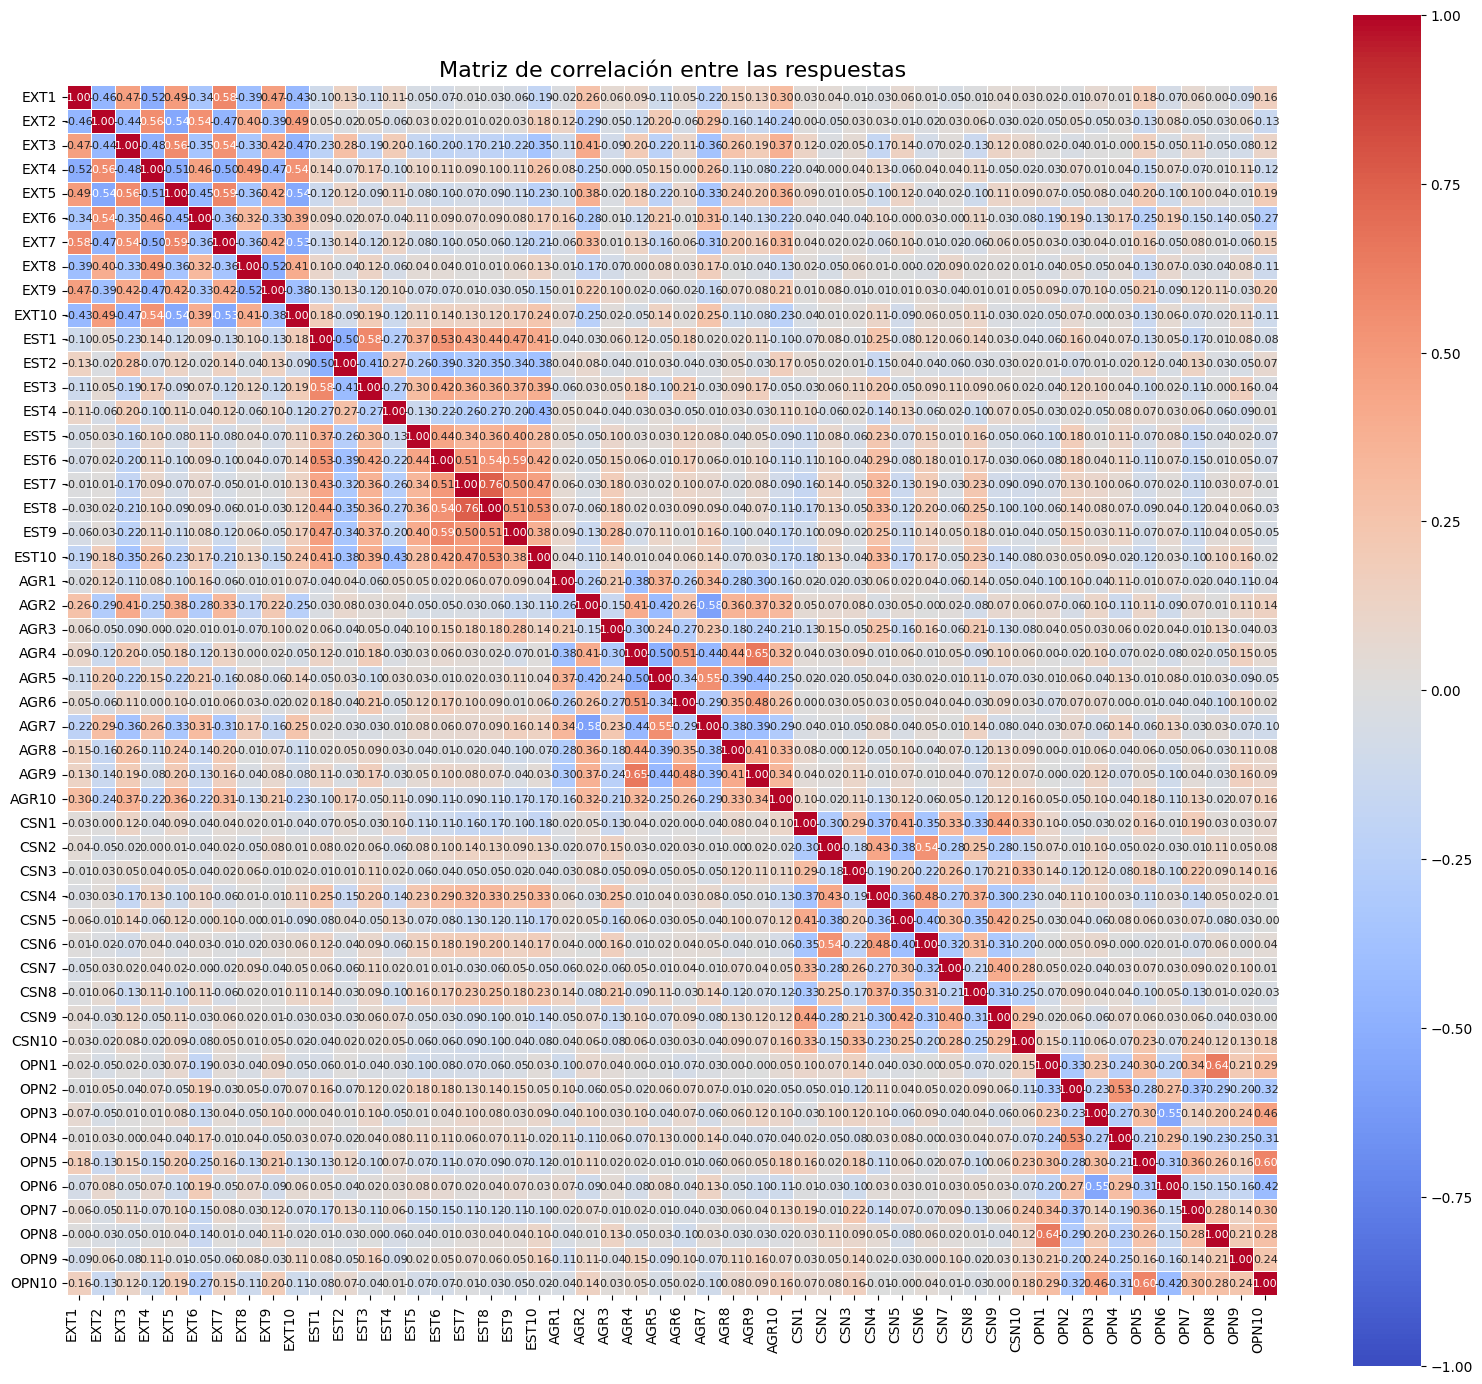

In [170]:
# Lista de las 50 columnas de respuestas
columns_bloc1 = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
                 "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
                 "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
                 "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
                 "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]

# Seleccionar las columnas de interés
data_responses = dataset[columns_bloc1]

# Calcular la matriz de correlación
correlation_matrix = data_responses.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(16, 14))  # Ajustar tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 8})

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

# Título y mostrar el gráfico
plt.title("Matriz de correlación entre las respuestas", fontsize=16)
plt.tight_layout()  # Asegura que todo se vea correctamente
plt.show()


In [171]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)

NÚMERO DE NANS POR COLUMNA:
EXT1_E                   11205
EXT2_E                   13156
EXT3_E                   12853
EXT4_E                   13490
EXT5_E                   16097
EXT6_E                   12353
EXT7_E                   14157
EXT8_E                   12285
EXT9_E                   12521
EXT10_E                  11878
EST1_E                   14927
EST2_E                   16466
EST3_E                   12187
EST4_E                   16963
EST5_E                   12304
EST6_E                   16876
EST7_E                   12195
EST8_E                   13082
EST9_E                   11986
EST10_E                  12646
AGR1_E                   12312
AGR2_E                   16304
AGR3_E                   11761
AGR4_E                   14209
AGR5_E                   12805
AGR6_E                   16480
AGR7_E                   12301
AGR8_E                   14398
AGR9_E                   11759
AGR10_E                  13993
CSN1_E                   19366
CSN2_E     

En aquest punt ja tenim els Nans i 0 controlats en les primeres 50 columnes que són les respostes dels enunciats, ara hem de mirar el mateix per a la resta d'atributs

Empezarem amb les columnes que tenen el temps que triga en respondre les questions

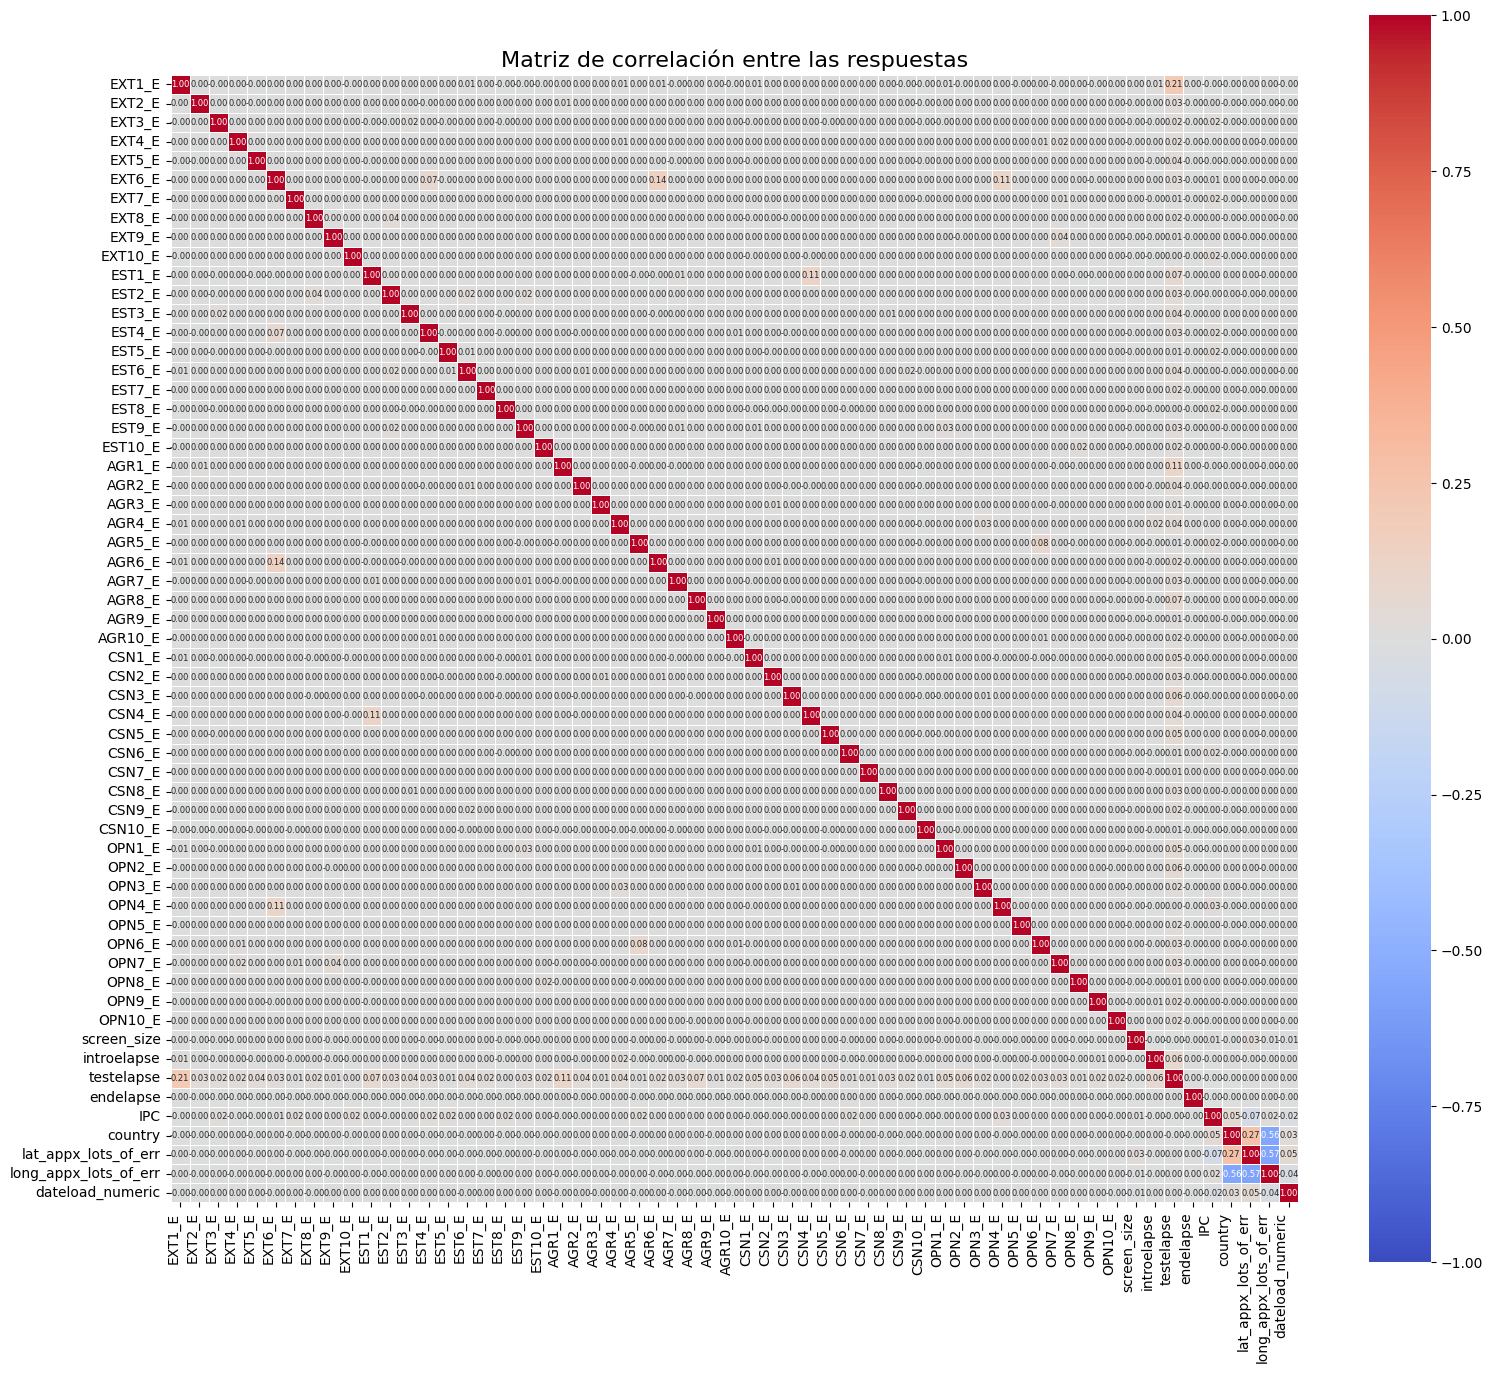

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las siguientes 50 columnas de respuestas
columns_bloc2 = ["EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
                 "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
                 "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
                 "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
                 "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E",
                 "screen_size", "introelapse", "testelapse", "endelapse", "IPC", 
                 "country", "lat_appx_lots_of_err", "long_appx_lots_of_err", "dateload_numeric"]

# Seleccionar las columnas de interés
data_responses_bloc2 = dataset[columns_bloc2]

# Calcular la matriz de correlación
correlation_matrix_bloc2 = data_responses_bloc2.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(16, 14))  # Ajustar tamaño de la figura
sns.heatmap(correlation_matrix_bloc2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6})  # Ajustar el tamaño de los números

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

# Título y mostrar el gráfico
plt.title("Matriz de correlación entre las respuestas", fontsize=16)
plt.tight_layout()  # Asegura que todo se vea correctamente
plt.show()


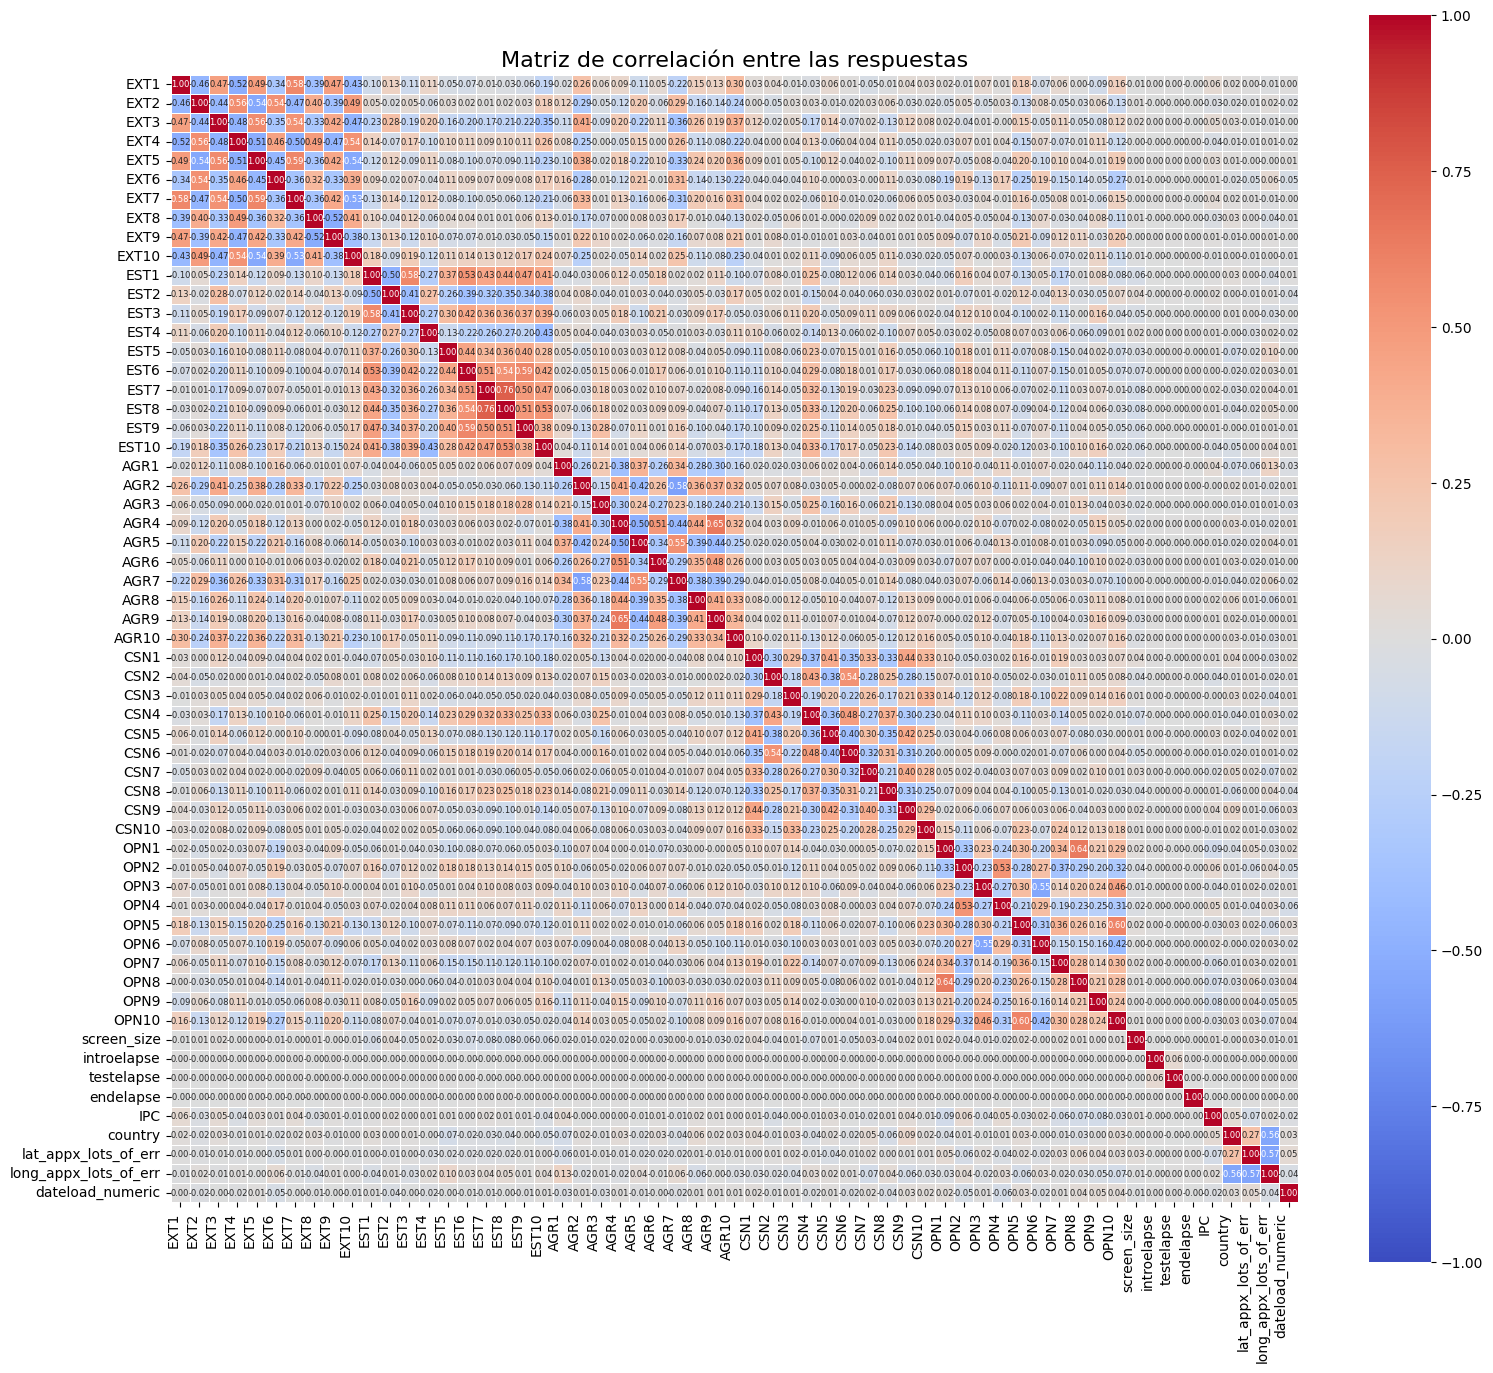

In [173]:
# Lista de las primeras 50 columnas de respuestas (bloc1)
columns_bloc1 = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
                 "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
                 "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
                 "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
                 "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10",
                 "screen_size", "introelapse", "testelapse", "endelapse", "IPC", 
                 "country", "lat_appx_lots_of_err", "long_appx_lots_of_err", "dateload_numeric"]

# Seleccionar las columnas de interés
data_responses = dataset[columns_bloc1]

# Calcular la matriz de correlación
correlation_matrix = data_responses.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(16, 14))  # Ajustar tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6})  # Ajustar el tamaño de los números

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

# Título y mostrar el gráfico
plt.title("Matriz de correlación entre las respuestas", fontsize=16)
plt.tight_layout()  # Asegura que todo se vea correctamente
plt.show()



In [175]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

# Lista de las columnas a normalizar
columns_bloc_norm = ["EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
                     "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
                     "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
                     "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
                     "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E",
                     "screen_size", "introelapse", "testelapse", "endelapse", "IPC", 
                     "country", "lat_appx_lots_of_err", "long_appx_lots_of_err", "dateload_numeric"]

# Configurar la figura para los Q-Q plots
plt.figure(figsize=(16, 12))

# Graficar el Q-Q plot para cada columna
for i, col in enumerate(columns_bloc_norm, 1):
    plt.subplot(6, 7, i)  # 6 filas y 7 columnas de gráficos
    stats.probplot(dataset[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {col}')

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

# Estandarización (Z-score) usando StandardScaler
dataset_norm = dataset.copy()  # Crear una copia del dataset
scaler = StandardScaler()  # Crear el objeto scaler

# Ajustar y transformar las columnas para obtener la normalización Z-score
dataset_norm[columns_bloc_norm] = scaler.fit_transform(dataset_norm[columns_bloc_norm])

# Mostrar el dataset estandarizado
print(dataset_norm[columns_bloc_norm].head())


MemoryError: Unable to allocate 15.3 MiB for an array with shape (1002047, 2) and data type float64

Error in callback <function _draw_all_if_interactive at 0x0000024FE31FDBC0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 15.3 MiB for an array with shape (2, 1001851) and data type float64

MemoryError: Unable to allocate 15.3 MiB for an array with shape (2, 1003154) and data type float64

<Figure size 1600x1200 with 34 Axes>